In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:

movie = pd.read_table(r'C:\Users\Vimlesh.Kumar\Downloads\Data\Data\movies.dat',sep = "::", names = ['MovieID','Movie','Genre'])
rating = pd.read_table(r'C:\Users\Vimlesh.Kumar\Downloads\Data\Data\ratings.dat',sep = "::", names = ['UserID', 'MovieID', 'Rating', 'TimeStamp'])
user = pd.read_table(r'C:\Users\Vimlesh.Kumar\Downloads\Data\Data\users.dat',sep = "::", names = ['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'])



<ipython-input-2-28cf2af877a2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie = pd.read_table(r'C:\Users\Vimlesh.Kumar\Downloads\Data\Data\movies.dat',sep = "::", names = ['MovieID','Movie','Genre'])
<ipython-input-2-28cf2af877a2>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating = pd.read_table(r'C:\Users\Vimlesh.Kumar\Downloads\Data\Data\ratings.dat',sep = "::", names = ['UserID', 'MovieID', 'Rating', 'TimeStamp'])
<ipython-input-2-28cf2af877a2>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and differen

In [3]:
movie

MovieID                               Movie  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                             Genre  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama  
3880                         Drama  
3881                         Drama  
3882                Drama|Thriller  

[3883 rows x 3 columns]

In [4]:
rating

UserID  MovieID  Rating  TimeStamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]

In [5]:
user

UserID Gender  Age  Occupation ZipCode
0          1      F    1          10   48067
1          2      M   56          16   70072
2          3      M   25          15   55117
3          4      M   45           7   02460
4          5      M   25          20   55455
...      ...    ...  ...         ...     ...
6035    6036      F   25          15   32603
6036    6037      F   45           1   76006
6037    6038      F   56           1   14706
6038    6039      F   45           0   01060
6039    6040      M   25           6   11106

[6040 rows x 5 columns]

In [7]:
# CHECK DATA
print(user.head())
print(movie.head())
print(rating.head())


   UserID Gender  Age  Occupation ZipCode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455
   MovieID                               Movie                         Genre
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  TimeStamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [8]:
# JOIN THE 3 DATASETS
rm = rating.join(movie.set_index('MovieID'), on='MovieID', how='left', lsuffix='l').drop('TimeStamp', axis=1)
rum = rm.join(user.set_index('UserID'), on='UserID', how='left')
rum.head()

UserID  MovieID  Rating                                   Movie  \
0       1     1193       5  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3        James and the Giant Peach (1996)   
2       1      914       3                     My Fair Lady (1964)   
3       1     3408       4                  Erin Brockovich (2000)   
4       1     2355       5                    Bug's Life, A (1998)   

                          Genre Gender  Age  Occupation ZipCode  
0                         Drama      F    1          10   48067  
1  Animation|Children's|Musical      F    1          10   48067  
2               Musical|Romance      F    1          10   48067  
3                         Drama      F    1          10   48067  
4   Animation|Children's|Comedy      F    1          10   48067

In [9]:
rum.isna().sum()     # NO NULL VALUES FOUND

UserID        0
MovieID       0
Rating        0
Movie         0
Genre         0
Gender        0
Age           0
Occupation    0
ZipCode       0
dtype: int64

In [10]:
rum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Movie       1000209 non-null  object
 4   Genre       1000209 non-null  object
 5   Gender      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
 8   ZipCode     1000209 non-null  object
dtypes: int64(5), object(4)
memory usage: 53.4+ MB


In [11]:
rum.describe()

UserID       MovieID        Rating           Age    Occupation
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  2.973831e+01  8.036138e+00
std    1.728413e+03  1.096041e+03  1.117102e+00  1.175198e+01  6.531336e+00
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00
25%    1.506000e+03  1.030000e+03  3.000000e+00  2.500000e+01  2.000000e+00
50%    3.070000e+03  1.835000e+03  4.000000e+00  2.500000e+01  7.000000e+00
75%    4.476000e+03  2.770000e+03  4.000000e+00  3.500000e+01  1.400000e+01
max    6.040000e+03  3.952000e+03  5.000000e+00  5.600000e+01  2.000000e+01

In [12]:

print(user['UserID'].count())     #6040 UNIQUE USERS
print(movie['MovieID'].count())   #3883 UNIQUE MOVIES


6040
3883


In [13]:
# ADD "OCCUPATION TYPE" AND "ACTUAL AGE" COLUMNS (BY CREATING DICTIONARY)

dict = {'Occupation':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'OccupationType':['Other or not specified', 'Academic/Educator', 'Artist', 'Clerical/Admin', 'College/grad student', 'Customer service', 'Doctor/Health care', 'Executive/Managerial', 'Farmer', 'Homemaker', 'K-12 Student', 'Lawyer', 'Programmer', 'Retired', 'Sales/Marketing', 'Scientist', 'Self-Employed', 'Technician/Engineer', 'Tradesman/Craftsman', 'Unemployed', 'Writer']}
occ = pd.DataFrame(dict)
rum1 = rum.join(occ.set_index('Occupation'), on = 'Occupation', how = 'left')

dict = {'Age':[1, 18, 25, 35, 45, 50, 56], 'AgeGroup':['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']}
age = pd.DataFrame(dict)
rum2 = rum1.join(age.set_index('Age'), on = 'Age', how = 'left')
rum2.head(2)

UserID  MovieID  Rating                                   Movie  \
0       1     1193       5  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3        James and the Giant Peach (1996)   

                          Genre Gender  Age  Occupation ZipCode  \
0                         Drama      F    1          10   48067   
1  Animation|Children's|Musical      F    1          10   48067   

  OccupationType  AgeGroup  
0   K-12 Student  Under 18  
1   K-12 Student  Under 18

In [14]:
a = rum2.groupby('Movie')['MovieID'].count().sort_values(ascending=False)

<AxesSubplot:xlabel='AgeGroup', ylabel='Rating'>

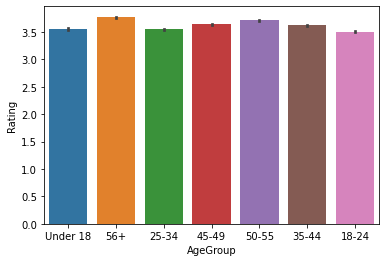

In [16]:
rum2.groupby('Gender')['Rating'].mean()
sns.barplot(x=rum2['AgeGroup'], y=rum2['Rating'])